# Chapter 03 : 로지스틱 회귀 모델
## 사전 지식
### 최대하강법
- 주어진 비용 함수의 지역 최솟값(local minimum)이나 전역 최솟값(global minimum)을 구하는 것은 수학적 최적화 과정 중 하나
- 경사 하강법 : 수학적 최적화 과정을 수행하는 방법의 하나
- 경사 or 그레이디언트의 역방향으로 입력값을 차례대로 이동하며 최소의 목푯값을 달성하는 모든 방법
- 최대하강법(steepest descent), 뉴턴법(Newton's method), BFGS 등 다양한 알고리즘이 존재
- 최대하강법 : 이터레이션마다 해당 점의 그레이디언트를 구하고 그 역방향으로 그레이디언트의 상수 배만큼 좌표를 이동하며 지역 최솟값을 찾는 최적화 알고리즘

#### 최대하강법 절차
1. 사전 정의된 스텝 사이즈(step size) $\Delta$가 주어지고 초기 시작점 $x_0$에서 시작
2. 최대 이터레이션에 도달하거나 허용 오차 내에서 $f(x_{t + 1}) \approx x_t-\Delta f'(x_t)$를 반복 계산하고 업데이트
- $\Delta$는 계산 결과를 반영하는 정도를 나타냄 $\rightarrow$ 학습률(learning rate)
- 최대(steepest)의미는 2차원 공간에 최대하강법을 적용하고 이를 그래프에서 확인할 경우 더욱 분명하게 확인할 수 있음

### 최대하강법 구현하기
- 함수의 형태가 매우 복잡하여 최솟값을 직접 유도할 수 없는 복잡한 경우에 해당 알고리즘을 적용함
- ex) $f(x) = x^2$

In [33]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

- 초기점(initial point)인 x0, 스텝 사이즈 Delta, 허용 오차 Tolerance 값을 정의
- 허용 오차 Tolerance : 정지 조건에 필요한 값, 이터레이션 중 파라미터 업데이트의 크기가 Tolerance보다 작다면 학습을 중지

In [34]:
x0, Delta, Tolerance = 2, 0.4, 0.005

- 그레이디언트를 계산하여 값을 반환하는 함수를 정의
- 그레이디언트의 함수식 정의는 딥러닝과 같이 체인 룰(chain rule)이 수많은 횟수로 중첩되어 적용되었을 때 매우 유용
- ex) $f(x) = x^2 \rightarrow f'(x) = 2x$

In [35]:
def grad(x):
    return 2 * x

- 이터레이션별 상황을 추적하고 이터레이션을 수행하는 코드를 구현
- 학습 히스토리를 저장하고자 리스트 xs를 정의하고 이터레이션별 x값을 저장
- ex) f'(x) = 2x $\rightarrow$ $f(x_{t + 1}) \approx x_t-\Delta f'(x_t)$ $\rightarrow$ $f(x_{t + 1}) = x_t-\Delta 2x_t$

In [36]:
xs = []
x_prev = x0

for cnt in range(100):
    cnt += 1
    xs.append(x_prev)
    x_curr = x_prev - 2 * Delta * grad(x_prev)
    
    diff = np.abs(x_curr - x_prev)
    if (diff <= Tolerance):
        break
        
    x_prev = x_curr
    
print("이터레이션 횟수 : ", cnt)
print("x_curr의 값 : ", x_curr)

이터레이션 횟수 :  14
x_curr의 값 :  0.0015672832819200039


- 누적한 히스토리(history)를 확인
- 결과 그래프 : 이터레이션 횟수에 따른 졈의 이동

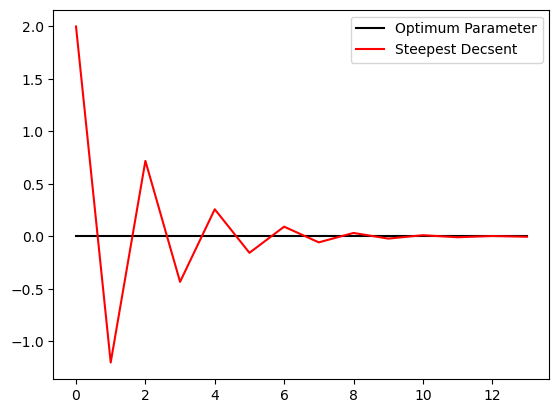

In [37]:
plt.plot([i for i in range(cnt)], [0] * cnt, 'k', label = 'Optimum Parameter')
plt.plot([i for i in range(cnt)], xs, 'r', label = 'Steepest Decsent')
plt.legend()

- 추정한 값이 해 위아래로 변하며 0에 가까워지는 것을 확인할 수 있음
- $\Delta$를 작게 설정하면 단방향으로 0으로 수렴하는 결과를 얻을 수도 있음
- $\Delta$를 직접 설정해야 한다는 점에서 부담과 여러 번의 시행착오가 있을 수 있음
- $\Delta$ 선택은 매우 중요
- $\Delta$를 너무 작게 잡으면 이터레이션마다 변동폭이 너무 적어 수렴 속도가 느려질 수 있음
- $\Delta$를 너무 크게 설정하면 진동이 발생할 수 있고, 마찬가지로 수렴 속도가 느려질 수 있음

뉴턴법 : 최대하강법에서의 $\Delta$를 상수가 아니라 2계 도함수의 역수인 $\frac{1}{f''(x)}$로 택하는 기법\
$\rightarrow$ 좋은 $\Delta$값을 이터레이션마다 사용자에게 지정해주기 위한 것으로 생각 가능

### 컨벡스 함수
- 함수 $f$가 컨벡스 함수(convex function)라면 지역 최솟값(local minimum)이 전역 최솟값(global minimum)이 되는 매우 좋은 성질이 있음
- 컨벡스 최적화(convex optimization) : 전역 최솟값을 찾는 과정 $\rightarrow$ 유일한 해가 도출됨
- 머신러닝의 경우 비용 함수를 최소화하는 과정을 거치게 되는데, 이때 비용 함수가 컨벡스 함수인지가 중요
- 컨벡스 함수 : $f(\lambda x + (1 - \lambda)y)\leq \lambda f(x) + (1 - \lambda)f(y)\;$ ($f : \mathbb{R}^n \rightarrow \mathbb{R}$이 모든 $x, y \in \mathbb{R}^n$과 $\lambda \in [0, 1]$에 대하여 만족)
- 임의의 두 점 (x, f(x)), (y, f(y))를 선택
- 두 점을 선분으로 이을 경우 그 선분이 그 사이의 구간에서 항상 f(x)보다 크거나 같음
- 미분 가능성의 가정이 필요하지 않음

#### 컨벡스 함수의 성질
1. $f : \mathbb{R}^n \rightarrow \mathbb{R}$과 $g : \mathbb{R}^n \rightarrow \mathbb{R}$이 모두 컨벡스 함수일 때 f + g도 컨벡스 함수
2. 함수 $f : \mathbb{R}^n \rightarrow \mathbb{R}$이 미분 가능한 컨벡스 함수라 가정했을 때, 임의의 $x, y \in \mathbb{R}^n$에 대하여 부등식 $f(y)\geq f(x) + \nabla f(x)^T(y - x)$이 성립하며 이의 역 또한 성립
3. $f : \mathbb{R}^n \rightarrow \mathbb{R}$가 컨벡스 함수이며 미분 가능하다고 가정할 때 $\nabla f(x^*) = 0$이면 $f(x^*)$는 $f$의 전역 최솟값 $\rightarrow f(y)\geq f(x^*) + \nabla f(x^*)^T(y - x^*) = f(x^*)$
4. 두 번 이상 미분가능하며 두 번 미분 후에도 연속인 함수 $f : \mathbb{R}^n \rightarrow \mathbb{R}$가 있고 헤시안 $\nabla^2f(x)$가 모든 $x \in \mathbb{R}^n$에 대하여 양의 준정부호 행렬이면 $f$는 컨벡스 함수

#### 컨벡스 함수와 컨케이브 함수
- 함수 $g : \mathbb{R}^n \rightarrow \mathbb{R}$이 모든 $x, y \in \mathbb{R}^n$과 $\lambda \in [0, 1]$에 대하여 $g(\lambda x + (1 - \lambda)y) \geq \lambda g(x) + (1 - \lambda)g(y)$을 만족하면 $g$를 컨케이브 함수(concave function)라 함
- $g$가 컨케이브 함수인 것과 $-g$가 컨벡스 함수인 것은 동치
- 선형 함수는 컨벡스 함수인 동시에 컨케이브 함수

## 1. 로지스틱 회귀 모델이란?
- 로지스틱 회귀(logistic regression)는 분류 문제(classification task)를 해결하는 가장 기본적인 머신러닝 모델의 하나
- 로지스틱 회귀라는 이름에도 불구하고 회귀가 아닌 분류에 사용
- 로짓 회귀(logit regression), MaxEnt 분류(maximum-entropy classification), 로그-선형 분류기(log-linear classifier) 등으로 부르기도 함
- 목표 클래스의 발생 확률을 로지스틱 함수(logistic function)로 모델링

## 2. 로지스틱 회귀 모델 구현하기
### 로지스틱 회귀 모델의 기본 이론
- 로지스틱 회귀 모델 : 주어진 이진 목푯값 y의 클래스 레이블 값이 1이 나올 확률 p(y)와 피처 벡터 x 사이의 관계를 모델링하는 기법

#### 로지스틱 회귀 모델 생성 과정
1. 피처 벡터 $x_i$가 외부에서 결정(exogenously determined)됨
2. $y_i$는 $x_i$와 $w$에 조건부로 정해지며 $y_i$가 1이 될 확률이 $p(y_i|x_i,\,w)$로, 0이 될 확률이 $1 - p(y_i|x_i,\,w)$로 주어지는 베르누이 분포(Bernoulli distribution)를 따름
    - $w$는 추정하고자 하는 값이지만, 상수로 이미 주어져 있다고 가정
3. $p(y_i|x_i,\,w)$에 따라 $y_i$가 결정됨

베르누이 분포
- 가장 간단한 형태의 분포 중 하나
- 특정한 사건의 발생 여부를 0과 1으로 모델링하는 것
- 특정한 일이 발생한 경우 : 1
- 특정한 일이 발생하지 않은 경우 : 0  

로지스틱 회귀 모델 생성 과정 2에서 $x_i$와 $p(y_i|x_i,\,w)$의 관계 모델링  
- 절편(intercept)을 모델에 포함하고자 $x_i,\,0 = 1$로 정의, 피처 행렬 X에 포함된다고 가정  
- $log\frac{p(y_i|x_i,\,w)}{1 - p(y_i|x_i,\,w)} = w_0 + w_1x_{i,1} + \dots + w_px_{i,p} = \displaystyle\sum_{j = 0}^{p} w_jx_{i,j}$  
- 우변의 선형 결합 $\displaystyle\sum_{j = 0}^{p} w_jx_{i,j}$이 커질수록 좌변에서의 $p(y_i|x_i,\,w)$ 또한 커지나 $p(y_i|x_i,\,w)$ 값이 0과 1 사이로 제한되므로 모델링하는 것  

피처 벡터 $x_i$를 행벡터로, 추정 파라미터 벡터 w를 열벡터로 표현  
- $log\frac{p(y_i|x_i,\,w)}{1 - p(y_i|x_i,\,w)} = x_iw$

위의 식을 $p(y_i|x_i,\,w)$에 대해 풀음  
- $p(y_i|x_i,\,w) = \frac{1}{1 + e^{-x_iw}} = \frac{e^{x_iw}}{1 + e^{x_iw}}$  
- $1 - p(y_i|x_i,\,w) = \frac{1}{1 + e^{x_iw}}$  

$\rightarrow p(y_i|x_i, \, w) = \sigma(x_iw)$  

과정 3에서는 과정 2에서 정의한 확률에 따라 $y_i$를 결정  
모델 학습 단계에서는 실제 데이터에서의 $y_i$값과 모델이 예측하는 $p(y_i|x_i,\,w)$값을 비교하여 손실 함수(loss function)를 정의할 수 있음  
- 손실 함수 : 샘플 하나에 대한 모델의 오차의 크기를 나타내는 함수
- 손실 함수를 전체 샘플에 대해 누계할 때 비용 함수가 얻어지는 것으로 생각 가능
  
  
$J(w) = -(1 - y_i)log(1 - p(y_i|x_i,\,w))-y_ilogp(y_i|x_i,\,w)$
- $y_i$가 1일 때 $p(y_i|x_i,\,w)$가 1에 가까울수록 작은 손실이 부과되고 0일 때 $p(y_i|x_i,\,w)$가 0에 가까울수록 작은 손실이 부과되도록 표현  

$J(w) = \displaystyle\sum_{i = 1}^{n} J_i(w) = \displaystyle\sum_{i = 1}^{n} (-(1 - y_i)log(1 - p(y_i|x_i,\,w))-y_ilogp(y_i|x_i,\,w)) = -\displaystyle\sum_{i = 1}^{n} \Bigg( y_ilog\frac{p(y_i|x_i,\,w)}{1 - p(y_i|x_i,\,w)} + log(1 - p(y_i|x_i,\,w))\Bigg )$  
$J(w) = \displaystyle\sum_{i = 1}^{n} (log(1 + e^{x_iw}) - y_ix_iw)$  
- 모든 i에 대하여 $log(1 + e^{x_iw})$와 $-y_ix_iw$ 모두가 컨벡스 함수  
$\rightarrow$  선형 결합인 비용 함수 $J(w)$ 또한 컨벡스 함수  
$\rightarrow$ 경사 하강법으로 찾은 해를 $J(w)$를 전역적으로 최소화함

#### 단변수 로지스틱 회귀 모델 최적화하기
- 피처 $x_i$가 앞과 다르게 벡터값이 아닌 스칼라값으로 주어졌다고 가정  
  
$log \frac{p(y_i|x_i,\,w)}{1 - p(y_i|x_i,\,w)} = w_0 + w_1x_i$  
비용 함수 $J(w) = \displaystyle\sum_{i = 1}^{n}\Big (log(1 + e^{w_0 + w_1x_1}) - y_i(w_0 + w_1x_i) \Big )$  
$w_0$에 대해 비용 함수의 편미분 값 $\frac{\partial J(w)}{\partial w_0} = \displaystyle\sum_{i = 1}^{n} \bigg ( \frac{e^{w_0 + w_1x_i}}{1 + e^{w_0 + w_1x_i}} - y_i \bigg )$ $\rightarrow$ $\frac{\partial J(w)}{\partial w_0} = \displaystyle\sum_{i = 1}^{n} \big ( p(y_i|x_i,\,w) - y_i\big )$  
$w_1$에 대해 비용 함수의 편미분 값 $\frac{\partial J(w)}{\partial w_1} = \displaystyle\sum_{i = 1}^{n} x_i \bigg ( \frac{e^{w_0 + w_1x_i}}{1 + e^{w_0 + w_1x_i}} - y_i \bigg )$ $\rightarrow$ $\frac{\partial J(w)}{\partial w_1} = \displaystyle\sum_{i = 1}^{n} x_i \big (p(y_i|x_i,\,w) - y_i \big )$  

#### 뉴턴법을 이용하여 다중 로지스틱 회귀 모델 최적화하기
행렬 형태의 수식을 전개
피처 행렬 $X = \begin{pmatrix} 1 & \cdots & x_{1,p} \\
                               \vdots  & \ddots & \cdots \\
                               1 & \cdots & x_{n,p} \end{pmatrix}$  
뉴턴법의 이터레이션에서는 다음과 같이 2계 도함수인 헤시안을 학습률로 지정  
$w^{(t + 1)} = w^{(t)} - \Bigg [ \bigg ( \frac{\partial^2J(w)}{\partial w \partial w^T} \bigg ) \frac{\partial J(w)}{\partial w} \Bigg ]$  
표기법의 편의상 벡터 $p를 p = [p_1, p_2, \dots, p_n]$으로 정의하며 $p_i = p(y_i|x_i,\,w)$라 함  
비용 함수의 1계 도함수 부분을 행렬 형태로 표현  
$\frac{\partial J(w)}{\partial w} = \displaystyle\sum_{i = 1}^{n} x_i(p(y_i|x_i,\,w) - y_i) = X^T(p - y)$  
  
2계 도함수 부분을 계산하고자 W를 대각 행렬로 정의  
$W = diag[p_i(1 - p_i)]_{i = 1}^{n} = \begin{pmatrix}
                                      p_1(1 - p_1) & 0 & \cdots & 0 \\
                                      0 & p_2(1 - p_2) & \cdots & 0 \\
                                      \vdots & \vdots & \ddots & \vdots \\
                                      0 & 0 & \cdots & p_n(1 - p_n)
                                      \end{pmatrix}$  
  
비용 함수의 헤시안 $H = \frac{\partial ^ 2 J(w)}{\partial w \partial w^T} = \displaystyle\sum_{i = 1}^{n} x_i^Tx_ip_i(1 - p_i) = X^TWX$  
  
뉴턴법의 이용한 비용 함수의 업데이트 공식  
$\rightarrow w^{(t + 1)} = w^{(t)} - \Bigg [ \bigg ( \frac{\partial ^ 2 J(w)}{\partial w \partial w^T} \bigg ) \frac{\partial J(w)}{\partial w} \Bigg ]_{w = w^{(t)}} = w^{(t)} - (X^TWX)^{-1}X^T(p - y)$  
  
 뉴턴법을 이용한 이터레이션은 그 폭이 너무 커 발산할 수 있으므로 실질적인 추정을 위해 학습률을 감쇄하는 하이퍼파라미터 $v(0 < v < 1)$를 도입하는 수정 뉴턴법을 많이 사용함
 #### 수정 뉴턴법을 이용한 로지스틱 회귀 모델의 해 도출
 초깃값
 1. 파아미터 $w^{(0)}$을 랜덤하게 초기화하고 $v(0<v<1)$를 적절한 값으로 정의
 2. $w^{(0)}$을 이용하여 각각의 $i$에 대하여 $p_i^{(0)} = \frac{e^{x_iw^{(0)}}}{1 + e^{x_iw^{(0)}}}$를 계산한 후 $W^{(0)} = diag[p_i^{(0)}(1 - p_i^{(0)})]_{i = 1}^n$를 계산  
  
알고리즘
- 정지 조건에 도달할 때까지 파라미터를 업데이트함  
$w^{(t + 1)} = w^{(t)} - v(X^TW^{(t)}X)^{-1}X^T(p^{(t)} - y)$
- $w^{(t)}$를 이용하여 $p^{(t)}$를 계산 후 다시 $p^{(t)}$를 이용하여 $W^{(t)}$를 계산한 다음, 계산한 값을 우변에 대입하여 $w^{(t + 1)}$을 계산

#### 시간 복잡도
- 로지스틱 회귀 모델의 학습은 최적화 방법을 나타내는 solver에 따라 크게 달라짐
- 뉴턴법 : 이터레이션의 수 $i$에 따라 소요 시간이 비례하며 $i$가 클수록 수렴값의 정밀성(precision)이 높아짐
- 뉴턴법을 이용한 수렴 시간 복잡도 : 헤시안 계산 때문에 다른 solver에 비해 높음

### 로지스틱 회귀 모델의 심화 이론
#### 규제
- 최적화 문제 측면에서 로지스틱 회귀는 L1 or L2 규제(regularization)가 포함된 비용 함수를 구성할 수 있음
- 규제 강도의 역수 하이퍼파라미터 C를 도입 (C에 큰 값을 설정할수록 규제의 효과가 약해지게 함)
- L1 규제의 비용 함수 $J_{L1}(w) = \parallel w \parallel _1 + C \bigg ( \displaystyle\sum_{i = 1}^{n} log(1 + e^{x_iw}) - y_ix_iw \bigg )$
- L2 규제의 비용 함수 $J_{L2}(w) = \frac{1}{2}w^Tw + C \bigg ( \displaystyle\sum_{i = 1}^{n} log(1 + e^{x_iw}) - y_ix_iw \bigg )$
- 엘라스틱 넷(elastic net) 규제 :  L1과 L2 규제를 조합한 것
- 엘라스틱 넷 규제의 비용 함수 $J_{Elastic Net}(w) = \rho \parallel w \parallel_1 + \frac{1 - \rho}{2}w^Tw + C \bigg ( \displaystyle\sum_{i = 1}^{n} log(1 + e^{x_iw}) - y_ix_iw \bigg )$
    - $\rho$ : L1 규제와 L2 규제의 효과를 조절하는 상수
    - $\rho$가 1일 때 L1 규제, 0일 때 L2 규제와 같음
- 로지스틱 회귀 모델의 비용 함수는 컨벡스 함수 + 규제항 $\parallel w \parallel_1$과 $\frac{1}{2}w^Tw$또한 컨벡스 함수  
$\rightarrow$ 규제항을 포함해도 로지스틱 회귀 모델의 비용 함수는 전역 최솟값(global minimum)을 찾기 위해 경사 하강법 적용 가능  

#### 다중 클래스 분류
- 다중 클래스 분류(multiclass classification) : 3개 이상의 클래스를 분류하는 문제
- K개의 클래스 레이블 $C = {C_1, C_2, \dots, C_K}$를 분류하는 다중 클래스 분류라고 가정

OVR(one-vs-rest) 방법  
- 각각의 $i = 1, 2, \dots, K$에 대하여 입력 샘플이 레이블 $C_i$에 포함될지 아닐지에 대한 확률만 계산하는 이빈 분류 모델 $M_i$를 학습
- 그 후 ${M_i | 1 \leq i \leq K}$의 결과를 종합하여 최종 클래스를 판정
- 결과의 종합 방법은 각각의 판정 확률 중 가장 높은 방법을 택하는 방식 등을 사용할 수 있음  
  
OVO(one-vs-one) 방법  
- OVR과 비슷하지만 $\begin{pmatrix} n\\ 2 \end{pmatrix} = \frac{n(n - 1)}{2}$개의 클래스 쌍에 대한 이진 분류 모형을 각각 학습한 후 이에 대한 결과를 종합  
  
모델에 따라 고유한 확장법
- 일부 머신러닝 모델에서는 모델의 원리를 이용해 자연스럽게 이진 클래스 분류를 다중 클래스 분류로 확장할 수 있음
- 로지스틱 회귀 모델이나 MLP 기법 등은 이진 클래스 분류일 때 시그모이드 함수로 클래스 분류 확률을 생성
- 다중 클래스 분류에서는 이를 확장한 소프트맥스 함수를 사용하여 여러 가지 클래스 분류 확률을 구할 수 있음  
소프트맥스 함수
- K개 클래스 분류 모델에서 사용됨
- K개 실숫값을 K개의 확률값으로 단조 변환하고자 사용
- $softmax(z)_i = \frac{exp(z_i)}{\sum_{i = 1}^{K} exp(z_i)}$
- K개의 클래스 분류를 위해 시그모이드 함수 정의를 확장한 것  
  
  
- OVR과 OVO는 이진 분류에서의 모델링을 여러 번 수행하고 종합하여 이를 다중 분류 모델로 확장하는 방법  
$\rightarrow$ 정보의 종합 방법만 잘 정의한다면 어느 머신러닝 기법에도 적용할 수 있음  
- OVR이나 OVO와 달리 특정 모델에서만 적용할 수 있는 고유 확장법이 있을 수도 있음
    - 클래스 수가 3개 이상일 때 시그모이드 함수 대신 소프트맥스 함수를 적용해 이항 로지스틱 회귀(binary logistic regression)를 확장한 다중 클래스 로지스틱 회귀 모델을 적용할 수 있음 $\rightarrow$ 다항 로지스틱 회귀(multinomial logistic regression) 모델

### 로지스틱 회귀 모델 구현하기
- 비용 함수에 뉴턴법을 적용하는 간단한 형태를 이용하여 이항 로지스틱 회귀 모델을 구현
- sklearn에서 제공하는 분류 데이터셋 중 데이터 규모가 비교적 큰 유방암 데이터셋 사용
- 간단한 상황을 가정하고자 맨 앞의 세 피처만 사용하여 모델링 수행

In [38]:
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

X, y = load_breast_cancer(return_X_y = True, as_frame = False)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 1234)

X_train, X_test = X_train[:, :3], X_test[:, :3]
y_train, y_test = y_train.reshape(-1, 1), y_test.reshape(-1, 1)

- 최적화 알고리즘이 단순화된 만큼 수렴의 안정성을 위해 스케일링을 수행하는 것이 필요
- 학습 데이터셋의 각 피처가 평균 0과 분산 1이 되도록 표준 스케일링(standard scaling)을 수행
- 같은 평균과 표준편차를 똑같이 테스트 데이터셋에도 적용
- 학습 데이터셋과 테스트 데이터셋에 각각 절편을 추가

In [39]:
train_mean, train_std = X_train.mean(axis = 0), X_train.std(axis = 0)

X_train, X_test = (X_train - train_mean) / train_std, (X_test - train_mean) / train_std

n, n_test = X_train.shape[0], X_test.shape[0]
X_train = np.append(np.ones((n, 1)), X_train, axis = 1)
X_test = np.append(np.ones((n_test, 1)), X_test, axis = 1)

- 최대 이터레이션 횟수와 조기 종료 조건을 설정
- 최대 10,000번을 반복, 파라미터 업데이트 크기가 유클리드 거리 기준으로 0.0001 이하가 되면 이터레이션을 종료

In [40]:
max_iter = 10000
Tolerance = 0.0001

- 파라미터를 초기화
- 편의상 모든 계수가 1인 상태를 초깃값으로 설정

In [41]:
beta_old = np.ones((4, 1))

- 이터레이션 수행
- W 행렬과 p 벡터를 정의한 후 이를 식에 대입하는 비교적 간단한 과정

In [42]:
for cnt in range(1, max_iter):
    W = np.zeros((n, n))
    p = np.zeros((n, 1))
    
    for i in range(n):
        xb = np.exp((X_train[i].reshape(1, -1) @ beta_old)[0][0])
        pi = xb / (1 + xb)
        W[i][i] = pi * (1 - pi)
        p[i] = pi
        
    left = np.linalg.inv(X_train.T @ W @ X_train)
    right = X_train.T @ (y_train - p)
    
    update = 0.0001 * (left @ right)
    beta_new = beta_old + update
    
    if (np.linalg.norm(update) < Tolerance):
        break
        
    if (cnt % 1000 == 0):
        print(f'이터레이션 : {cnt}, 업데이트 크기 : {np.linalg.norm(update)}')
        
    beta_old = beta_new
    
print(f'이터레이션 : {cnt}, 업데이트 크기 : {np.linalg.norm(update)}')
print()
print('학습한 파라미터')
print(beta_new)

# 최대 이터레이션 10,000에 도달하면 이터레이션은 종료하고 업데이트 크기가 5,000번째 이터레이션을 기점으로 다시 증가
# 파라미터 업데이트 시 학습률 크기를 단순화했지만
# 이 때문에 이터레이션 5,000회 이후에는 상대적인 학습률의 크기가 필요 이상으로 커서 해가 발산하는 현상으로 추정
# 실제로는 업데이트 크기가 계속 감소하다가 Tolerance 아래로 내려가 최대 이터레이션 도달 전에 종료하는 것이 이상적

이터레이션 : 1000, 업데이트 크기 : 0.0014765820989698008
이터레이션 : 2000, 업데이트 크기 : 0.0008288194947011249
이터레이션 : 3000, 업데이트 크기 : 0.0005888637557052147
이터레이션 : 4000, 업데이트 크기 : 0.0005016460961682245
이터레이션 : 5000, 업데이트 크기 : 0.000480588720186066
이터레이션 : 6000, 업데이트 크기 : 0.000492169075454186
이터레이션 : 7000, 업데이트 크기 : 0.0005216582869967076
이터레이션 : 8000, 업데이트 크기 : 0.0005614510237056337
이터레이션 : 9000, 업데이트 크기 : 0.0006068663712749307
이터레이션 : 9999, 업데이트 크기 : 0.0006545214496913837

학습한 파라미터
[[ 4.96797147e-01]
 [ 5.07895925e+00]
 [ 2.20184378e-03]
 [-5.65908436e+00]]


- 학습한 파라미터로 학습 데이터셋과 테스트 데이터셋에서의 정확도(accrancy)를 계산
- 학습 데이터셋 내의 각 샘플에 대해 루프를 돌며 옳은 예측치의 수를 세고, 이 수와 샘플 전체 수의 비율을 정확도로 함

In [43]:
right = 0
for i in range(X_train.shape[0]):
    xb = np.exp((X_train[i].reshape(1, -1) @ beta_old)[0][0])
    pi = xb / (1 + xb)
    if (pi >= 0.5 and y_train[i] == 1) or (pi < 0.5 and y_train[i] == 0):
        right += 1
        
print(f'학습 데이터셋 정확도 : {right / X_train.shape[0] * 100 : .2f}%')

right = 0
for i in range(X_test.shape[0]):
    xb = np.exp((X_test[i].reshape(1, -1) @ beta_old)[0][0])
    pi = xb / (1 + xb)
    if (pi >= 0.5 and y_test[i] == 1) or (pi < 0.5 and y_test[i] == 0):
        right += 1
        
print(f'테스트 데이터셋 정확도 : {right / X_test.shape[0] * 100 : .2f}%')

학습 데이터셋 정확도 :  84.51%
테스트 데이터셋 정확도 :  76.06%


## 3. 패키지로 표현하기
sklearn.linear_model.LogisticRegression 클래스
- 로지스틱 회귀 모델을 구현
- 이진 분류와 다중 클래스 분류를 모두 수행할 수 있음
- L1, L2, 엘라스틱 넷 규제 또한 적용할 수 있음
- solver 하이퍼파라미터에는 비용 함수 최적화 알고리즘으로 'liblinear', 'newton-cg', 'lbfgs', 'sag', 'saga' 중 하나를 선택할 수 있음  
  
'newton-cg' : 컬레기울기법(conjugate gradient method)  
- 희소 데이터셋(sparse dataset)에서 추천  
  
'lbfgs' : L-BFGS-B 알고리즘  
- 작은 크기의 데이터셋에 추천
- 데이터의 크기가 크다면 성능이 떨어질 수 있음 
  
'liblinear' : 최적화된 좌표 하강법(coordinate descent) 알고리즘  
- 데이터의 크기가 작을 때 추천  
  
'sag' : SAG(stochastic average gradient descent) 알고리즘  
- 샘플 개수와 피처 개수가 모두 큰 대형 데이터셋에서 빠르게 수렴
- 빠른 수렴은 각 피처의 스케일이 비슷할 때만 보장되므로 sklearn.preprocessing 모듈의 클래스를 사용해 데이터를 전처리하는 것이 좋음
  
'saga' : SAG 알고리즘의 변형  
- 'sag'와 마찬가지로 대형 데이터셋에서 잘 동작
- 피처 스케일에 대한 정규화를 선행하는 것이 좋음  

다항 분류 + L2 규제 : 'lbfgs', 'newton-cg', 'sag', 'saga'  
OVR + L2 규제 : 'liblinear', 'lbfgs', 'newton-cg', 'sag', 'saga'  
다항 분류 + L1 규제 : 'saga'  
OVR + L1 규제 : 'liblinear', 'saga'  
엘라스틱 넷 규제 : 'saga'  
규제 미부여 기능 : 'lbfgs', 'newton-cg', 'sag', 'saga'  

- LogisticRegression 클래스에서의 각 solver의 옵션을 나타냄
- 다항 분류 옵션 : 다중 클래스 분류 시 크로스 엔트로피 비용 함수(cross-entropy cost function)를 이용한 다항 로지스틱 회귀를 수행할 수 있는지를 나타냄
- 다항 분류 옵션이 제공되지 않는다면 다중 클래스가 나올 경우 각각의 클래스마다 이진 분류를 OVR 방식으로 수행한 후 이 것을 종합하는 방식으로 모델이 구성됨

LogisticRegression 클래스의 주요 하이퍼파라미터  
penalty
- 주요값 : 'l1', 'l2', 'elasticnet', 'none'
- 기본값 : 'l2'
- 의미 : 규제 페널티 선택
    - 'l1' : L1 규제 적용
    - 'l2' : L2 규제 적용
    - 'elasticnet' : 엘라스틱 넷 규제 적용
    - 'none' : 규제 미부여  
  
tol  
- 주요값 : float > 0
- 기본값 : 1e-4
- 의미 : 학습 종료에 대한 허용 오차 설정
  
C 
- 주요값 : float > 0
- 기본값 : 1.0
- 의미 : 규제 페널티 크기의 역수
  
fit_intercept  
- 주요값 : bool
- 기본값 : True
- 의미 : 절편 항 포함 여부를 결정
  
class_weight
- 주요값 : None, dict, 'balance'
- 기본값 : None
- 의미 : 클래스별 가중치 부여 방법
    - None : 동일 가중치
    - dict : 사용자 지정 가중치
    - 'balance' : 클래스 빈도(frequency)에 반비례한 가중치
  
random_state  
- 주요값 : int
- 기본값 : None
- 의미 : solver가 'sag', 'saga', 'liblinear'일 때 데이터를 섞게 되는데, 이에 대한 랜덤성을 제어하고자 사용
  
solver  
- 주요값 : 'newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'
- 기본값 : 'lbfgs'
- 의미 : 최적화 알고리즘의 선택, 강건성때문에 'lbfgs'가 기본 solver로 주어짐
  
max_iter  
- 주요값 : int > 0
- 기본값 : 100
- 의미 : 이터레이션 횟수의 상한선
  
multi_class  
- 주요값 : 'auto', 'ovr', 'multinomial'
- 기본값 : 'auto'
- 의미 : 다중 클래스 분류 방법을 선택 (클래스가 2개라면 옵션에 따른 결과 차이는 없음)
    - 'ovr' : OVR 분류 수행
    - 'multinomial' : 크로스 엔트로피 비용 함수 사용
    - 'auto' : solver가 'liblinear'일 때만 'ovr'을 선택하고 나머지는 'multinomial'을 선택
  
l1_ratio  
- 주요값 : None, float
- 기본값 : None
- 의미 : 엘라스틱 넷 규제가 포함된 비용 함수에서 $\rho$에 해당함 (penalty가 'elasticnet'일 때만 유효)
  
실제 사용 시 활용 팁
- 정확도(accrancy), 정밀도(precision), 재현율(recall) 등의 성능 개선 측면에서는 하이퍼파라미터 튜닝에 사용할 수 있는 경우의 수가 다른 모델과 비교하여 상대적으로 적음
    - 비용 함수 자체를 변화하는 하이퍼파라미터를 중심으로 튜닝하는 것이 좋음
- 규제항에 포함되지 않은 로지스틱 모델은 solver의 활용과 관련된 일부 경우를 제외하고 피처 스케일링에 거의 영향을 받지 않음
    - 하지만 LogisticRegression 객체는 생성 시 규제항을 포함하며, 규제항은 계수 전체의 L1 합이나 L2 합의 크기를 규제하기 때문에 피처의 스케일이 다른 경우 모델 예측역에 큰 영향을 줄 수 있음
    $\rightarrow$ 피처의 스케일 차이가 클 경우에는 피처 스케일링을 선행해야 함
    
#### 피처 스케일링이 필요한 모델
- 거리를 기반으로 동작하거나 비용 함수가 피처의 범위에 크게 영향을 크게 받는다면 모델보다 피처 스케일링을 먼저 진행하는 것이 필수
- OLS, 트리, 랜덤 포레스트 모델 : 일반적으로 스케일링 여부에 예측력이 영향을 받지 않음
- 로지스틱 회귀, 라쏘, 릿지 등 비용 함수에 규제항이 포함된 모델 : 스케일링에 따라 예측력이 달라지게 됨
    - 규제항을 포함하면 개수 크기의 L1 혹은 L2 합 전체를 규제하게 됨 (비용 함수가 큰 계수의 값에 영향을 받기 때문)
- 다층 퍼셉트론(multilayer perceptron, MLP) 등 비용 함수가 복잡하고 전역 최적값 탐색이 어려운 모델 : 스케일링 필수
    - 비용 함수에 규제항이 없어도 비용 함수 자체를 잘 학습시키는 것이 어렵기때문
- K-최근접 이웃(K-nearest neighbors, KNN), 군집 분석 모델 등 거리를 기반으로 동작 : 스케일링 필수
    - 모델이 주어진 샘플과 가까운 샘플을 찾아내는 것처럼

In [44]:
# LogisticRegression 클래스 사용하기

import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

X, y = load_breast_cancer(return_X_y = True, as_frame = True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 1234)

X_train, X_test = X_train.iloc[:, :3], X_test.iloc[:, :3]

- 로지스틱 회귀 모델을 학습하고 학습 데이터셋과 테스트 데이터셋에 각각 적용해 정확도를 산출
- 이론적 단순화를 위해 규제 페널티의 역수 C를 100,000으로 설정 $\rightarrow$ 규제 효과가 거의 발생하지 않도록
- 규제가 없다면 피처 스케일링 여부는 모델의 성능에 영향을 끼치지 않음 $\rightarrow$ 피처 스케일링 없이 모델의 학습과 평가를 수행

In [45]:
clf = LogisticRegression(random_state = 1234, C = 100000)

clf = clf.fit(X_train, y_train)
y_train_pred = clf.predict(X_train)

y_pred = clf.predict(X_test)

print(f'학습 데이터셋 정확도 : {(y_train == y_train_pred).sum() / len(y_train) * 100 : .2f}%')
print(f'테스트 데이터셋 정확도 : {(y_test == y_pred).sum() / len(y_test) * 100 : .2f}%')

학습 데이터셋 정확도 :  93.18%
테스트 데이터셋 정확도 :  87.23%


## 4. 로지스틱 회귀 모델 보충 수업
### 피처 스케일링과 파이프라인
- 피처 스케일링(feature scaling) : 각 피처의 범위를 비슷하게 변환하는 것
    - 표준 스케일링(standard scaling) : 평균과 분산을 통일 (sklearn.preprocessing 모듈의 StandardScaler 클래스)
    - 최소-최대 스케일링(min-max scaling) : 최솟값과 최댓값을 통일 (sklearn.preprocessing 모듈의 MinMaxScaler 클래스)
- 피처 스케일링을 포함한 모든 전처리에서는 테스트 데이터에도 학습 데이터와 같은 기준(학습 데이터로 계산한 기준값)을 그대로 적용해야 함
  
- 파이프라인(pipeline) : 일련의 정의된 과정을 하나의 함수로 정의하여 사용할 수 있게 하는 것  
  
파이프라인 단계
1. 데이터셋을 학습과 테스트 데이터셋으로 분할 : sklearn.model_selection의 train_test_split() 함수 활용
2. 학습 데이터셋에 스케일링 적용 : 스케일링을 수행하는 클래스의 객체 scaler를 정의 후 scaler.fit() 함수 활용
3. 모델 학습 수행 : 학습 모델 클래스의 객체 model을 생성 후 model.fit() 함수 활용
4. 테스트 데이터셋에 학습 데이터셋 기준의 스케일링 적용 : scaler.transform() 함수 활용
5. 학습된 모델에 스케일링한 피처를 입력하고 예측값 산출 : model.predict() 함수 활용
6. 예측값과 목푯값을 비교하여 모델 성능 측정 : sklearn.metrics.accuracy_score() 등의 함수 활용
  
sklearn.pipeline.Pipeline 클래스를 사용한 파이프라인 단순화
1. 데이터셋을 학습 데이터셋과 테스트 데이터셋으로 분할
2. Pipeline 클래스를 이용해 스케일링과 학습을 순서대로 수행하도록 정의한 객체 pipe 생성
3. 학습 데이터셋으로 pipe 객체 학습
4. pipe 객체에 테스트 데이터셋을 적용하여 예측값 산출
5. 예측값과 목푯값을 비교하여 모델 성능 측정

In [46]:
# 피처 스케일링과 학습 파이프라인

import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

X, y = load_breast_cancer(return_X_y = True, as_frame = True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 1234)

- 표준 스케일링과 로지스틱 회귀 모델링을 차례대로 수행하는 Pipeline 클래스의 객체 pipe를 정의
- 이를 사용해 학습을 수행

In [47]:
scaler = StandardScaler()
clf = LogisticRegression(random_state = 1234, solver = 'sag')
pipe = Pipeline(steps = [("scaler", scaler), ("clf", clf)])

pipe.fit(X_train, y_train)

C:\Users\82108\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Pipeline(steps=[('scaler', StandardScaler()),
                ('clf', LogisticRegression(random_state=1234, solver='sag'))])

- 학습된 pipe 객체에 예측 데이터셋을 입력하여 예측값을 구하고 정확도를 산출
- pipe 객체의 predict() 메서드를 사용할 때는 학습 데이터를 기준으로 얻은 스케일링 값과 모델 파라미터가 적용된다는 점에 유의

In [48]:
y_pred = pipe.predict(X_test)

print(f'정확도 : {(y_pred == y_test).mean() * 100 : .2f}%')

정확도 :  94.68%


### 통계 모델로서의 로지스틱 회귀 기법
- 머신러닝 관점이 아닌 통계학 관점에서 로지스틱 회귀 모델의 최대 가능도 추정(maximum likelihood estimation, MLE)을 통한 해를 구할 수도 있음
  
#### MLE
- 주어진 데이터를 이용해 가능도(likelihood)를 최대화하는 파라미터를 찾는 통계 기법
- 최대 가능도 추정량(maximum likelihood esimator) : 결합 가능도(joint likelihood)를 최대화하는 w의 추정량(estimator)
    - 관측값 $x_i$ $(1 \leq i \leq n)$ : 확률밀도함수(probability density function) $f_X(x | w_1, w_2, \dots, w_p)$에서 추출한 독립 항등 분포(independent and identically distributed, IID) 샘플
    - $w = [w_1, w_2, \dots, w_p]$ : 추정해야 할 파라미터   
$\hat{w} = argmax_w \displaystyle\prod_{i=1}^n logf_X(x_i | w)$

- 로그 함수가 단조 증가 함수 $\rightarrow$ 로그-결합 가능도(log-joint likelihood)를 최대화하는 문제와 같음  
$\hat{w} = argmax_w \displaystyle\sum_{i=1}^n logf_X(x_i | w)$  
  
정규 분포(normal distribution)에서의 평균 $\mu$와 분산 $\sigma^2$에 대한 MLE
- IID 정규 분포 $N(\mu, \sigma^2)$를 따르는 $X_i \; (1 \leq i \leq n)$의 확률밀도함수 $f_{X_i}(x;\mu,\sigma^2) = \frac{1}{\sigma\sqrt{2\pi}}e^{-\frac{1}{2}(\frac{x - \mu}{\sigma})^2}$  
$\rightarrow$ 로그-결합 가능도 $l(x_1, x_2, \dots, x_n;\mu, \sigma^2) = \displaystyle\sum_{i = 1}^{n} logf_{X_i}(x_i;\mu, \sigma^2) = -\frac{1}{2\sigma^2} \displaystyle\sum_{i = 1}^{n} (x_i - \mu)^2 - \frac{1}{2} nlog(2\pi\sigma^2)$  
- 로그-결합 가능도를 $\mu$대해 미분  
$\frac{\partial l}{\partial\mu} = -\frac{1}{2\sigma^2} \displaystyle\sum_{i = 1}^{n} 2(\mu - x_i) = 0$ $\quad \rightarrow \quad$ $\hat{\mu} = \frac{1}{n} \displaystyle\sum_{i = 1}^{n} x_i$
- 로그-결합 가능도를 $\sigma^2$에 대해 미분하고 $\hat{\mu}$을 대입  
$\frac{\partial l}{\partial\sigma^2} = \frac{1}{2\sigma^4} \displaystyle\sum_{i = 1}^{n} (x_i - \mu)^2 - \frac{n}{2\sigma^2} = 0$ $\quad \rightarrow \quad$ $\hat{\sigma}^2 = \frac{1}{n} \displaystyle\sum_{i = 1}^{n} (x_i - \mu)^2$

#### 로지스틱 회귀 모델의 MLE
- 베르누이 분포 Bernoulli(p)에서의 확률 분포  
    - $Pr(Y = 0) \quad = \quad 1 - p$
    - $Pr(Y = 1) \quad = \quad p$
- 베르누이 분포의 확률 질량 함수(probability mass function, PMF)  
$Pr(Y = y_i) = p(y_i)^{y_i}(1 - p(y_i))^{1 - y_i},\; y_i = 0 \,or\, 1$
- 로지스틱 회귀 모델에서의 $i$번째 관측값의 로그 가능도 계산  
$l_i(w|x_i) = y_ilogp(y_i) + (1 - y_i)log(1 - p(y_i))$
- n개의 관측값에 대한 결합 로그 가능도 = 각각의 로그 가능도 합  
$l(w|x_1, \dots, x_n) = \displaystyle\sum_{i = 1}^{n} l_i(w|x_i) = \displaystyle\sum_{i = 1}^{n} \big ( (1 - y_i)log(1 - p(y_i) + y_ilogp(y_i) \big ) = \displaystyle\sum_{i = 1}^{n} \Bigg ( y_ilog\frac{p(y_i)}{1 - p(y_i)} + log(1 - p(y_i)) \Bigg )$
- 로지스틱 회귀 모델에서의 결합 가능도  
$l(w|x_1, \dots, x_n) = \displaystyle\sum_{i = 1}^{n} \Big ( y_ix_iw - log(1 + e^{x_iw})\Big )$
  
- 결합 로그 가능도가 최댓값이 되는 $w$rk 로지스틱 회귀 모델의 MLE
- 결합 로그 가능도의 값 : 비용 함수 $J(w)$와 부호는 반대, 정확히 같은 절댓값  
$\rightarrow$ $l(w|x_1, \dots, x_n)$의 최댓값을 찾는 것 = $J(w)$의 최솟값을 찾는 것
- 컨케이브 함수(concave function)의 최댓값을 찾는 것 = 컨백스 함수(convex function)의 최솟값을 찾는 방법
  
규제가 없는 로직스틱 회귀 모델에 통계학 가정을 추가할 때 얻은 파라미터의 신뢰 구간과 유의 확률을 계산할 수 있음
- statsmodels 패키지 이용

### 교차검증법
sklearn.linear_model.LogisticRegressionCV 클래스
- 교차검증법을 동반한 로지스틱 회귀를 수행하고 규제 강도의 역수 C 등 최적의 하이퍼파라미터를 탐색
- 'newton-cg', 'sag', 'saga', 'lbfgs' solver는 warm_start를 사용할 경우 고차원의 밀집 데이터셋에서 빠르게 수행될 수 있음

### 피처 선택법
- 주어진 피처의 집합에서 일부틔 피처만 모델에 포함하는 피처 선택법(feature selection)
- 로지스틱 회귀 모델의 비용 함수에 L1 규제를 추가할 때 예측에 기여하는 정도가 적은 일부 피처의 계수가 0이 되며, 해당 피처는 예측 모델에 사용하지 않게 됨

### 3장 되새김 문제
#### 1. LogisticRegression 클래스 적용하기
- 붓꽃 데이터셋을 다중 클래스 분류 모델로 학습하고 그 결과를 평가

In [49]:
# 필요한 패키지와 데이터셋 정의

import numpy as np
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score

X, y = load_iris(return_X_y = True, as_frame = True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 1234)

- 최소-최대 스케일러(min-max scaler)를 학습 데이터셋 피처에 적용하여 피처 스케일링을 수행하고 그 결과를 LogisticRegression 클래스로 학습하라.
- SAGA 알고리즘으로 해를 최적화하도록 하며, 다중 클래스 분류를 위해 OVR 방법을 사용하도록한다.
- 결과 재현성을 위해 random_state는 1234로 설정한다.
- 그 후 학습한 결과를 테스트 데이터셋에 적용하고 target이 1일 때의 정밀도(precision)를 구하라.  
$Precision^{(target = 1)} = \frac{목푯값이 1이고 예측값도 1인 샘플의 수}{예측값이 1인 샘플의 수}$

In [50]:
scaler = MinMaxScaler()
clf = LogisticRegression(random_state = 1234, solver = 'saga')
pipe = Pipeline(steps = [("scaler", scaler), ("clf", clf)])

pipe.fit(X_train, y_train)

y_pred = pipe.predict(X_test)

pre = precision_score(y_test, y_pred, average = None)
print(f'정밀도 : {pre[1] * 100 : .2f}%')

정밀도 :  94.12%


#### 로지스틱 회귀 모델용 데이터셋 생성하기
- 로지스틱 회귀 모델을 따르는 적당한 데이터셋을 생성하고 이를 평가

In [54]:
# 필요한 패키지 정의
# 데이터셋이 정의되어 있다고 가정

import numpy as np
import pandas as pd

n = 300
np.random.seed(1234)
X1 = np.random.normal(0, 1, size = n)
X2 = np.random.normal(0, 1, size = n)
X3 = np.random.normal(0, 1, size = n)
X4 = np.random.normal(0, 1, size = n)
X5 = np.random.normal(0, 1, size = n)

X = pd.DataFrame({'X1' : X1, 'X2' : X2, 'X3' : X3, 'X4' : X4, 'X5' : X5})

테스트할 로지스틱 회귀 모델의 조건
1. 절편을 모델에 포함한다.
2. 재현성을 위해 random_state = 1234로 설정한다.
  
다음 조건을 만족하는 목푯값 y를 생성하라.
1. 절편과 X1, X2의 계수는 모두 음수값이 얻어진다.
2. X3, X4, X5의 계수는 모두 양수값이 얻어진다.
3. 모델의 학습 데이터 내 정확도는 75%에서 80% 사이로 얻어진다.

In [63]:
y_state = []
intercept = -2
beta = np.array([[-2, -2, 3, 4, 5]]).reshape(-1, 1)

np.random.seed(1111)
for i in range(n):
    xb = np.exp((intercept + (X.iloc[i].values.reshape(1, -1) @ beta)[0][0]) + np.random.normal(0, 7.5))
    pi = xb / (1 + xb)
    if (pi >= 0.5):
        y = 1
    else:
        y = 0
        
    y_state.append(y)
    
y = pd.Series(y_state)

In [64]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(random_state = 1234)
clf = clf.fit(X, y)

print(f'절편 : {clf.intercept_[0]}')
print(f'계수 : {clf.coef_[0]}')

y_pred = clf.predict(X)

print(f'정확도 : {(y == y_pred).mean() * 100 : .2f}%')

절편 : -0.5786869408956349
계수 : [-0.52203159 -0.51494024  0.71392631  1.05416056  1.06007824]
정확도 :  78.00%
